MACHINE LEARNING

LAB ASSESSMENT - 4

SAM ABRAHAM JOSHY

20BCE0986

LAB L43+L44

1. Implement Hierarchical clustering.

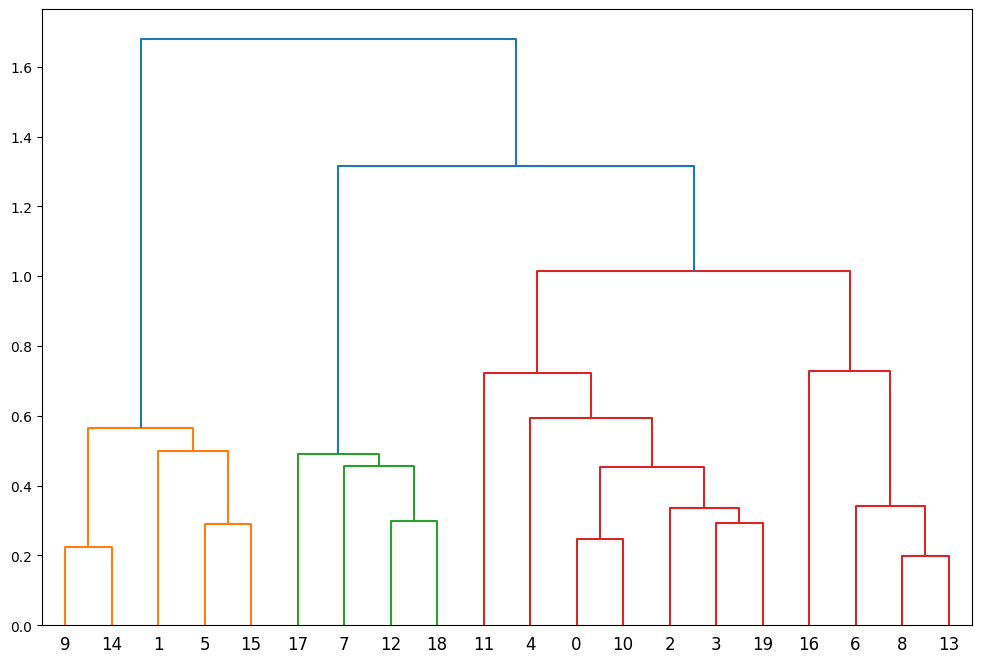

In [14]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Create a sample array
np.random.seed(123)
X = np.random.rand(20, 4)
Z = linkage(X, 'ward')

# Plot
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)

plt.show()


2.Implement Gaussian Mixture Model Using the Expectation Maximization.

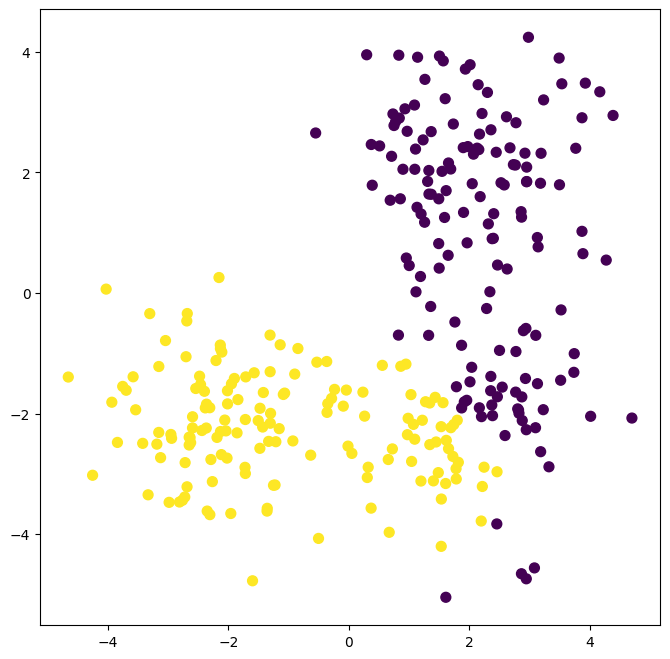

In [15]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Generate some data
np.random.seed(0)
X = np.vstack([np.random.randn(100, 2) + [2, 2],
               np.random.randn(100, 2) + [-2, -2],
               np.random.randn(100, 2) + [2, -2]])

gmm = GaussianMixture(n_components=2)

gmm.fit(X)

labels = gmm.predict(X)

# Visualize 
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')


3. Evaluating ML algorithm with balanced and unbalanced datasets.

In [16]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Generate a balanced dataset
X_bal, y_bal = make_classification(n_samples=1000,
                                    n_features=10, weights=[0.5, 0.5], random_state=123)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal,
                                                                     y_bal, test_size=0.2, random_state=123)
model_bal = LogisticRegression(random_state=123)
model_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = model_bal.predict(X_test_bal)
print("Balanced Dataset:")
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("Classification Report:\n", classification_report(y_test_bal, y_pred_bal))

# Generate an unbalanced dataset
X_unbal, y_unbal = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=123)
X_train_unbal, X_test_unbal, y_train_unbal, y_test_unbal = train_test_split(X_unbal, y_unbal, test_size=0.2, random_state=123)
model_unbal = LogisticRegression(random_state=123)
model_unbal.fit(X_train_unbal, y_train_unbal)
y_pred_unbal = model_unbal.predict(X_test_unbal)
print("Unbalanced Dataset:")
print("Accuracy:", accuracy_score(y_test_unbal, y_pred_unbal))
print("Classification Report:\n", classification_report(y_test_unbal, y_pred_unbal))


Balanced Dataset:
Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.97      0.94      0.95       101

    accuracy                           0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.95       200

Unbalanced Dataset:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       177
           1       0.84      0.70      0.76        23

    accuracy                           0.95       200
   macro avg       0.90      0.84      0.87       200
weighted avg       0.95      0.95      0.95       200



4. Implement K‐means Clustering.

Cluster centers:
[[0.68057184 0.71758764]
 [0.66020666 0.20992015]
 [0.23104274 0.57255892]]
Labels:
[1 2 1 0 1 2 1 2 2 0 0 0 1 1 2 2 2 1 0 0 1 2 1 0 0 2 0 2 2 0 0 0 1 1 2 2 0
 2 1 2 2 1 0 1 2 0 2 0 2 2 0 2 2 0 1 2 2 2 0 2 1 2 0 2 1 1 0 1 1 2 2 0 0 1
 0 2 2 1 0 1 0 1 0 2 0 1 0 1 2 2 1 2 0 2 0 2 2 2 2 1]


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


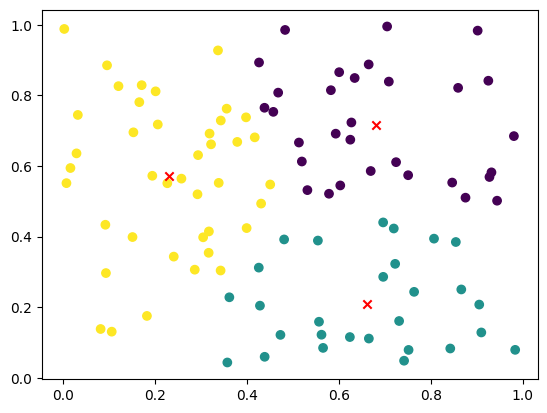

In [17]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(123)
X = np.random.rand(100, 2)

# K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)

print("Cluster centers:")
print(kmeans.cluster_centers_)
print("Labels:")
print(kmeans.labels_)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.show()



5. Implement K-mode clustering.

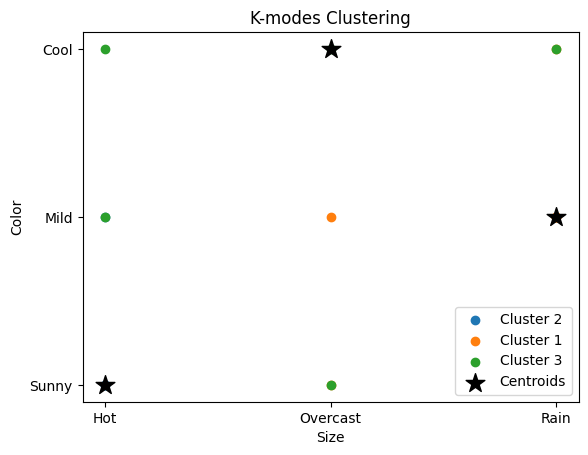

In [28]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def k_modes(X, K, max_iter=100):
    n_samples, n_features = X.shape

    centroids = np.array([X[np.random.choice(n_samples)] for _ in range(K)])

    for _ in range(max_iter):
        clusters = defaultdict(list)
        for i, x in enumerate(X):
            distances = [np.sum(x != c) for c in centroids]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].append(i)

        # Update centroids based on the modes of each cluster
        for i in range(K):
            cluster_samples = X[clusters[i]]
            new_centroid = []
            for j in range(n_features):
                feature_counts = defaultdict(int)
                for sample in cluster_samples:
                    feature_counts[sample[j]] += 1
                mode = max(feature_counts, key=feature_counts.get)
                new_centroid.append(mode)
            centroids[i] = new_centroid

    return clusters, centroids

# Sample data
X = np.array([
    ['Hot', 'Sunny', 'High', 'Weak', 'No'],
    ['Hot', 'Sunny', 'High', 'Strong', 'No'],
    ['Overcast', 'Sunny', 'High', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Hot', 'Mild', 'High', 'Weak', 'No'],
    ['Hot', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Hot', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Sunny', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Strong', 'No']
])


K = 3

# Run K-modes algorithm
clusters, centroids = k_modes(X, K)

# Visualize results
fig, ax = plt.subplots()
for i, cluster in clusters.items():
    cluster_samples = X[cluster]
    ax.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {i+1}')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black', label='Centroids')
ax.set_xlabel('Size')
ax.set_ylabel('Color')
ax.set_title('K-modes Clustering')
ax.legend()
plt.show()


6.Compare the performance of following machine learning algorithms for the 'National Institute of Diabetes and Digestive and Kidney Diseases" Dataset available in the kaggle database.
a)K-Nearest Neigbour Classifier b)Decision Tree Classifier c)Support Vector Machine

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier


data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#KNN CLASSIFIER
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print('K-nearest neighbor classifier accuracy:', accuracy_knn*100,"%")


# Decision Tree Classifier 
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print('Decision tree classifier accuracy:', accuracy_dtc*100,"%")

#SVM

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Support vector machine accuracy:', accuracy_svm*100,"%")






K-nearest neighbor classifier accuracy: 66.23376623376623 %
Decision tree classifier accuracy: 74.67532467532467 %
Support vector machine accuracy: 75.32467532467533 %


7.Implement the Principle Component Analysis for Dimensionality Reduction


pca =  [0.72962445 0.22850762]


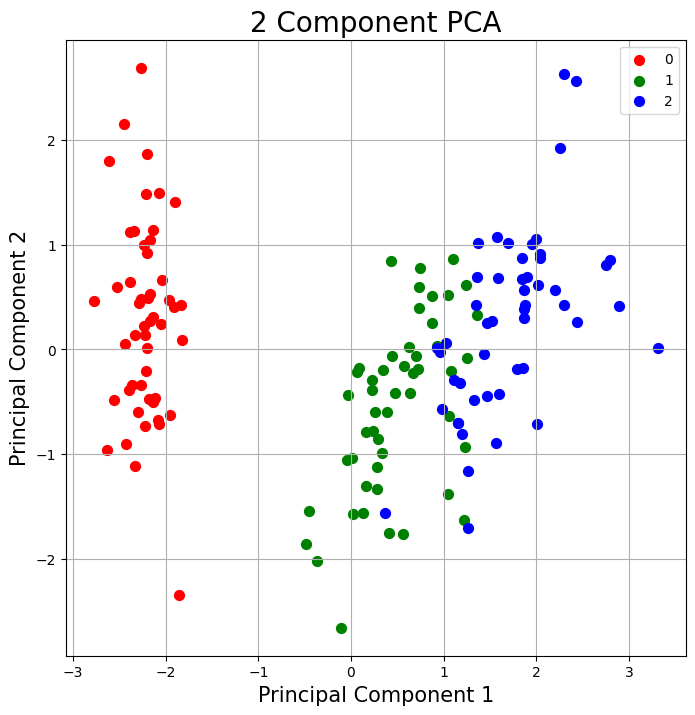

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()

# Standardize the dataset
X = iris.data
y = iris.target
X = StandardScaler().fit_transform(X)

# Apply PCA with n_components=2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a new dataframe with the reduced dimensions
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
final_df = pd.concat([principal_df, pd.DataFrame(y, columns=['target'])], axis = 1)

# Visualize the results
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'],
               final_df.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()
print("pca = ",pca.explained_variance_ratio_)

